In [66]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import wget

In [68]:
page_url = "https://covid19.ncdc.gov.ng/"
response = requests.get(page_url).text

doc = bs(response, 'html.parser')

headers = doc.find('thead').text.split('\n')
new_headers = [header for header in headers if header != '']
new_headers

tr_tags = doc.find('tbody').find_all('tr')
tr_tags

data = []
states = []
cases_lab = []
cases_admitted = []
discharged = []
deaths = []

for tag in tr_tags:
    state = tag.find_all('td')
    data.append(state)

for record in data:
    states.append(record[0].text.replace('\n', '').strip())
    cases_lab.append(record[1].text.strip())
    cases_admitted.append(record[2].text.strip())
    discharged.append(record[3].text.strip())
    deaths.append(record[4].text.strip())

df_data = {}
df_data['States Affected'] = states
df_data['No. of Cases (lab confirmed )'] = cases_lab
df_data['No. of Cases (admitted)'] = cases_admitted
df_data['Discharged'] = discharged
df_data['Deaths'] = deaths

covid_data = pd.DataFrame(df_data)


In [70]:
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]

[wget.download(url) for url in urls]

['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_recovered_global.csv']

In [71]:
deaths_global = pd.read_csv(
    'time_series_covid19_deaths_global.csv', sep=',')
recovered_global = pd.read_csv('time_series_covid19_recovered_global.csv', sep=',')
confirmed_global = pd.read_csv(
    'time_series_covid19_confirmed_global.csv', sep=',')


In [72]:
confirmed_global.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/5/21', '12/6/21', '12/7/21', '12/8/21', '12/9/21', '12/10/21',
       '12/11/21', '12/12/21', '12/13/21', '12/14/21'],
      dtype='object', length=697)

In [73]:
dates = confirmed_global.columns[4:]

In [74]:
id_variables = ['Province/State', 'Country/Region', 'Lat', 'Long']
confirmed_global_long = confirmed_global.melt(
    id_vars = id_variables,
    value_vars = dates,
    var_name = 'Date',
    value_name = 'Confirmed'
)

deaths_global_long = deaths_global.melt(
    id_vars=id_variables,
    value_vars=dates,
    var_name='Date',
    value_name='deaths'
)

recovered_global_long = recovered_global.melt(
    id_vars=id_variables,
    value_vars=dates,
    var_name='Date',
    value_name='recovered'
)


In [75]:
recovered_global_long = recovered_global_long[recovered_global_long['Country/Region'] != 'Canada']

In [76]:
recovered_global_long.head()

,Province/State,Country/Region,Lat,Long,Date,recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [77]:
# Merging the dataframes
full_data = confirmed_global_long.merge(
    right=recovered_global_long,
    how="left",
    on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date']
)

full_data = full_data.merge(
    right=deaths_global_long,
    how='left',
    on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date']
)


In [78]:
full_data['Date'] = pd.to_datetime(full_data['Date'])

In [79]:
full_data.isna().sum()

Province/State    133749
Country/Region         0
Lat                 1386
Long                1386
Date                   0
Confirmed              0
recovered          14553
deaths                 0
dtype: int64

In [80]:
full_data['recovered'] = full_data['recovered'].fillna(0)

In [81]:
nigeria_table = full_data[full_data['Country/Region'] == 'Nigeria']
nigeria_table.reset_index(inplace=True, drop=True)
nigeria_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,recovered,deaths
0,NaN,Nigeria,9.082,8.6753,2020-01-22,0,0.0,0
1,NaN,Nigeria,9.082,8.6753,2020-01-23,0,0.0,0
2,NaN,Nigeria,9.082,8.6753,2020-01-24,0,0.0,0
3,NaN,Nigeria,9.082,8.6753,2020-01-25,0,0.0,0
4,NaN,Nigeria,9.082,8.6753,2020-01-26,0,0.0,0


### External Data

In [82]:
covid_external = pd.read_csv('covid_external.csv', sep=',')
budget_data = pd.read_csv('Budget data.csv', sep=',')
realGdp = pd.read_csv('RealGDP.csv', sep=',')

In [83]:
covid_data

,States Affected,No. of Cases (lab confirmed ),No. of Cases (admitted),Discharged,Deaths
0,Lagos,"81,030",221,"80,053",756
1,FCT,"24,069",556,"23,289",224
2,Rivers,"13,114",153,"12,807",154
3,Kaduna,"10,198",70,"10,047",81
4,Plateau,"10,007",58,"9,876",73
5,Oyo,"8,870",94,"8,585",191
6,Edo,"6,692",84,"6,328",280
7,Ogun,"5,482",106,"5,296",80
8,Ondo,"4,591",18,"4,475",98
9,Kano,"4,453",40,"4,291",122


In [94]:
covid_data.convert_dtypes()
def function(x): return x.replace(",", '')

covid_data['No. of Cases (admitted)'] = covid_data['No. of Cases (admitted)'].apply(function)
covid_data['No. of Cases (lab confirmed )'] = covid_data['No. of Cases (lab confirmed )'].apply(function)
covid_data['Deaths'] = covid_data['Deaths'].apply(function)
covid_data['Discharged'] = covid_data['Discharged'].apply(function)

In [95]:
covid_data['lab_confirmed_cases'] = pd.to_numeric(covid_data['No. of Cases (lab confirmed )'], errors='coerce')
covid_data['admitted_cases'] = pd.to_numeric(covid_data['No. of Cases (admitted)'], errors='coerce')
covid_data['discharged'] = pd.to_numeric(covid_data['Discharged'], errors='coerce')
covid_data['deaths'] = pd.to_numeric(covid_data['Deaths'], errors='coerce')

covid_data.drop([
    'No. of Cases (lab confirmed )',
    'No. of Cases (admitted)',
    'Discharged',
    'Deaths'
], inplace=True, axis=1)


In [96]:
covid_data

,States Affected,lab_confirmed_cases,admitted_cases,discharged,deaths
0,Lagos,81030,221,80053,756
1,FCT,24069,556,23289,224
2,Rivers,13114,153,12807,154
3,Kaduna,10198,70,10047,81
4,Plateau,10007,58,9876,73
5,Oyo,8870,94,8585,191
6,Edo,6692,84,6328,280
7,Ogun,5482,106,5296,80
8,Ondo,4591,18,4475,98
9,Kano,4453,40,4291,122


[Text(0.5, 0, 'States Affected'),
 Text(0, 0.5, 'No. of Cases (Lab Confirmed)'),
 Text(0.5, 1.0, 'Top 10 States in terms of Lab Confirmed covid cases')]

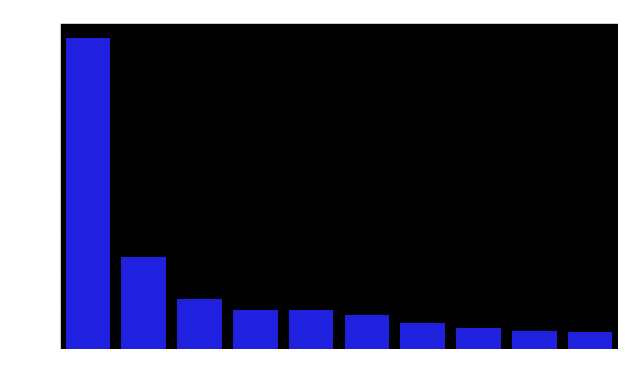

In [105]:
#Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test
covid_data = covid_data.sort_values(by='lab_confirmed_cases', ascending=False)
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(
    x=covid_data['States Affected'].head(10),
    y=covid_data['lab_confirmed_cases'].head(10),
    data=covid_data,
    ax=ax,
    color='blue'
    )
ax.set(
    xlabel = "States Affected",
    ylabel = "No. of Cases (Lab Confirmed)",
    title = "Top 10 States in terms of Lab Confirmed covid cases"
)

In [106]:
covid_data = covid_data.sort_values(by='discharged', ascending=False)

[Text(0.5, 0, 'States Affected'),
 Text(0, 0.5, 'Discharged Covid Cases'),
 Text(0.5, 1.0, 'Top 10 states in terms of discharged covid cases')]

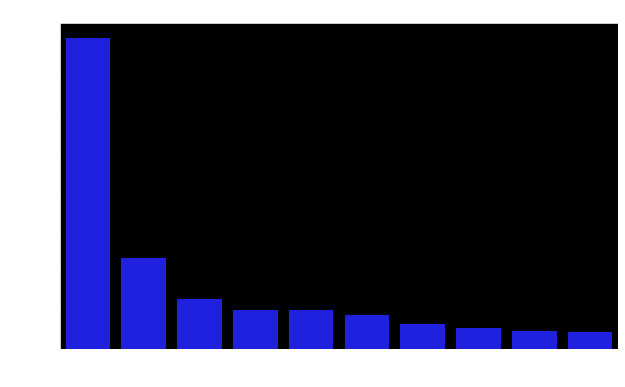

In [110]:
fig_dim = (10, 6)
fig, ax = plt.subplots(figsize=fig_dim)
sns.barplot(
    x=covid_data['States Affected'].head(10),
    y=covid_data['discharged'].head(10),
    ax=ax,
    data=covid_data,
    color='blue'
)
ax.set(
    xlabel = 'States Affected',
    ylabel = 'Discharged Covid Cases',
    title = "Top 10 states in terms of discharged covid cases"
)

In [111]:
covid_data = covid_data.sort_values(by='deaths', ascending=False)

[Text(0, 0.5, 'Deaths'), Text(0.5, 1.0, 'Top 10 Death Cases')]

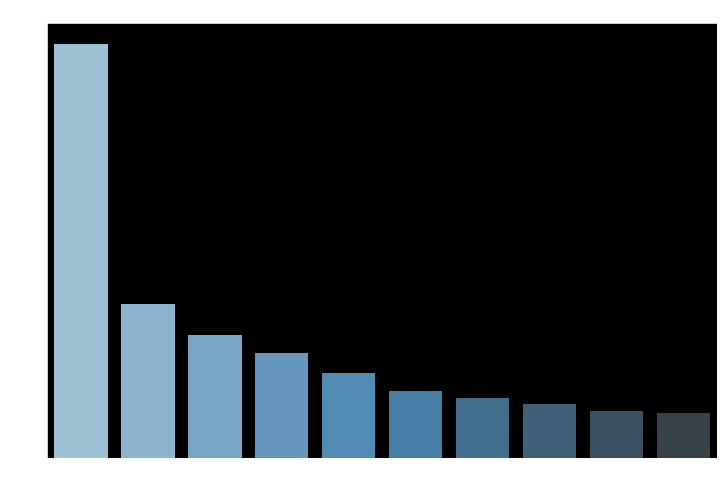

In [113]:
fig_dim = (12, 8)
fig, ax = plt.subplots(figsize=fig_dim)

sns.barplot(
    x=covid_data['States Affected'].head(10),
    y=covid_data['deaths'].head(10),
    ax=ax,
    data=covid_data,
    palette="Blues_d"
)

ax.set(
    ylabel="Deaths",
    title="Top 10 Death Cases"
)

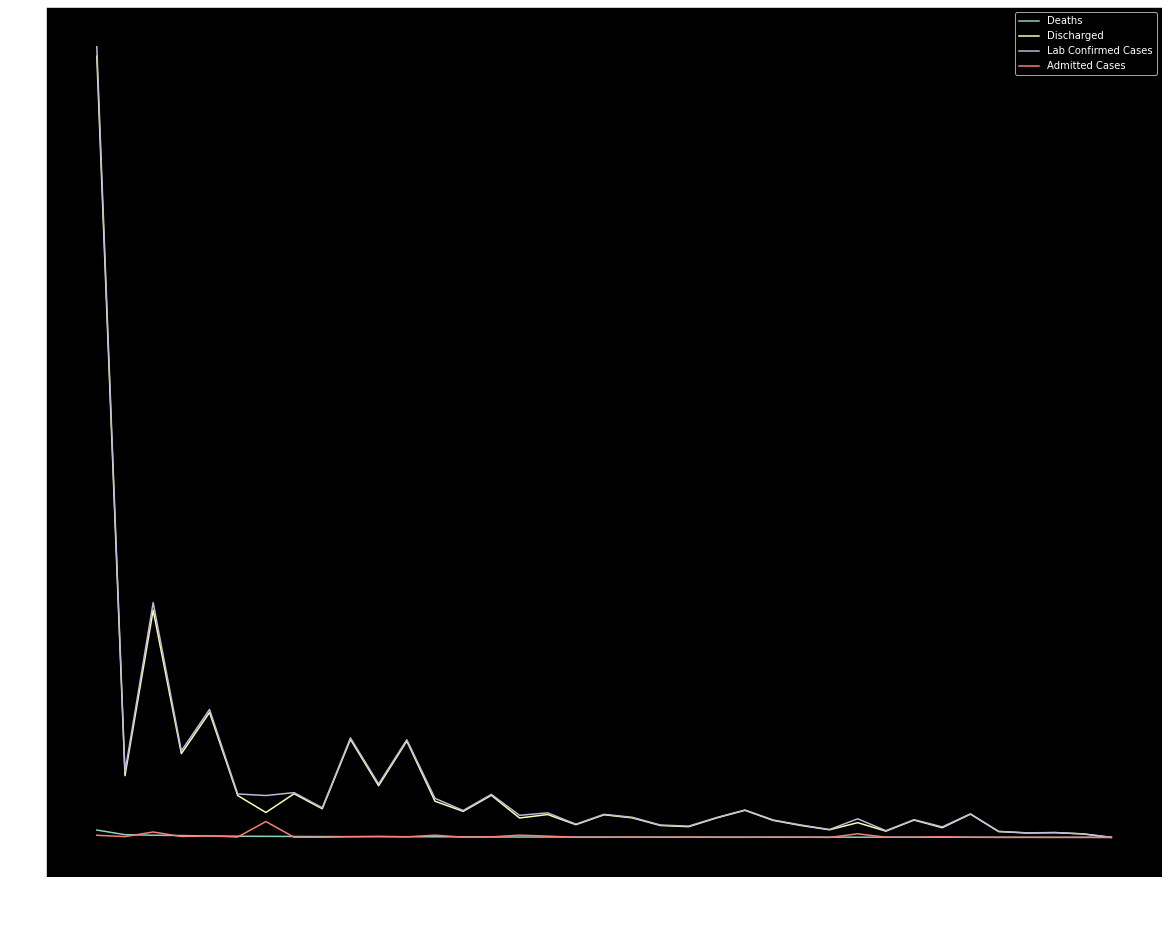

In [128]:
fig_dim = (20, 16)
fig, ax = plt.subplots(figsize=fig_dim)
x = covid_data['States Affected']

ax.plot(x, covid_data['deaths'], label='Deaths')
ax.plot(x, covid_data['discharged'], label='Discharged')
ax.plot(x, covid_data['lab_confirmed_cases'], label='Lab Confirmed Cases')
ax.plot(x, covid_data['admitted_cases'], label="Admitted Cases")
ax.legend()
plt.xticks(rotation=45)
plt.show()
